# Tutorial 2

**Monday 17th of January**
- **Tutorial 2 - Part 1**: Natural chromaticity – MAD-X tracking module (groups of 3/4 students).
- **Tutorial 2 - Part 2**: Chromaticity correction – impact of non-linearities (groups of 3/4 students).
- **Tutorial 2 - Part 3**: Design of a transfer line  - optics and matching (groups of 3/4 students).

$\color{red}{\text{Homework + Tutorial 2 jupyter-notebooks}}$ (to be delivered as late on Wednesday 19th 18:00 to nuria.fuster@ific.uv.es). This will be considered as a BONUS to pass the accelerator design workshop oral exam. 


# Tutorial 2: Part 1

Objectives:

- Quantify the natural chromaticity of our FODO cell.
- First tracking of particles.

**Natural chromaticity**
<div>
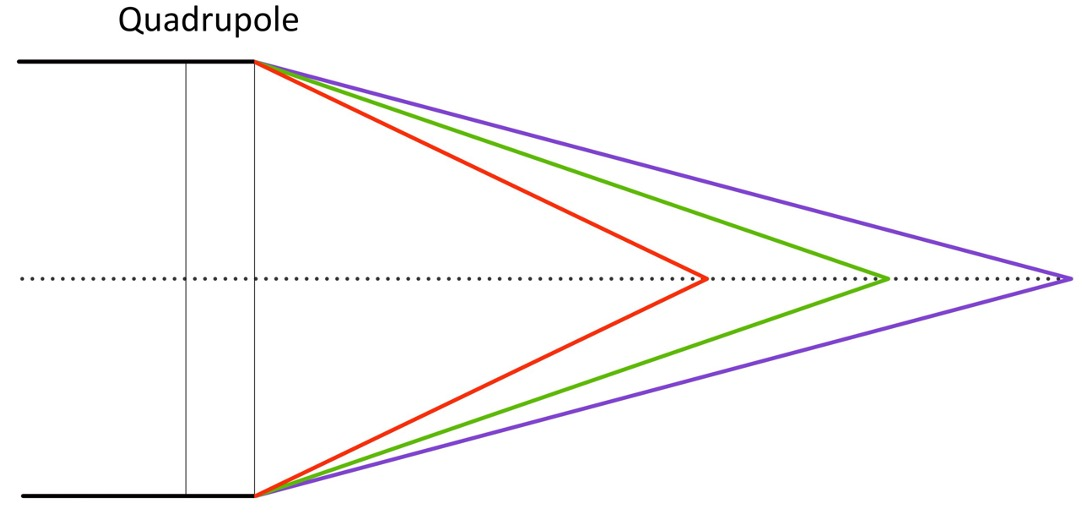
</div>


1. With a matching block adjust the tunes of the cell from Tutorial 1 - Part 3 to 0.25, both horizontal and vertical.


2. Using the chromaticities obtained from the TWISS, compute the tunes for particles with $\Delta p / p = 10^{-3}$.


3. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 turns. Plot the x-px phase space. 

      **REMEMEBER** that in order to use the TRACK command you need to convert your lattice into a thin lattice. You will need the following commands:
    
        select, flag=MAKETHIN, SLICE=5;
        MAKETHIN, SEQUENCE=MY_SEQUENCE;
        use, sequence=MY_SEQUENCE;
        
    **It is important when defining the SEQUENCE to refer to the the center, to make it compatible with the makethin command! So you may need to re-define the s location in your sequence accordingly.**

    The track module to be use:
    
        track, dump;    
        start, x=1e-3, px=0, y=1e-3, py=0;    
        run, turns=100;   
        endtrack;

    **HINT**: In oder to access the track data using python you can print the output in a dataframe using the command: particle1=myMad.table['track.obs0001.p0001'].dframe(). If you have tracked two particles, the second particle output can be obtained via particle2=myMad.table['track.obs0002.p0002'].dframe().


4. How does the particle move in the phase space turn after turn? Do you see the tunes?

**BONUS:**

5. Track a particle with initial coordinates x,y,px,py=(100, 100, 0, 0) mm in 100 turns. Plot the x-px phase-space. Does something change with respect to the previous case? Why?


6. Repeat the tracking adding DELTAP=1e-2 to the track command. How does the phase space look now? Is the tune still same? It may help to look only at the first 4 turns to get a clearer picture.

        track, dump, DELTAP=1e-2;  


In [3]:
from matplotlib import pyplot as plt
import numpy as np
from cpymad.madx import Madx 

# Matching the tunes
1. With a matching block adjust the tunes of the cell of Tutorial 1 - Part 3 to 0.25, both horizontal and vertical.

In [ ]:
myMad = Madx()
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=5;
dipoleLength=15;
cellLength=100;
nBend=736;

myKF=0.0056;
myKD=-0.0056;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: quadrupole, L=quadrupoleLength, K1:=myKF;
QD: quadrupole, L=quadrupoleLength, K1:=myKD;
BM: sbend, L=dipoleLength, angle=2*pi/nBend; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=0;
B1: BM, at =10;
B2: BM, at =30;
q2: QD, at=50;
B3: BM, at =60;
B4: BM, at =80;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=7000;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS BEFORE MATCHING
! *********************************************************************

twiss, table=beforematching, file="BeforeMatching.txt";
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="BeforeMatching";

! *********************************************************************
! MATCHING
! *********************************************************************

MATCH, SEQUENCE=myCell;
GLOBAL, Q1=??;//H-tune
GLOBAL, Q2=??;//V-tune
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
ENDMATCH;


! *********************************************************************
! TWISS AFTER MATCHING
! *********************************************************************

twiss, table=aftermatching, file="AfterMatching.txt";
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="AfterMatching";

! *********************************************************************
! FINAL TUNE VALUES
! *********************************************************************

value, table(summ,Q1)*(nBend/4);
value, table(summ,Q2)*(nBend/4);

'''
myMad.input(myString);

# Chromaticity
2. Using the chromaticities obtained from the TWISS, compute the tunes for $\Delta p / p = 10^{-3}$.

**REMEMBER** That the derivative functions in MAD-X are normalized by the relativistic factor beta.

We could assume ultra-relativistic beam.

# Tracking
3. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells. Plot the x-px phase space. 

      **REMEMEBER** that in order to use the TRACK command you need to convert your lattice into a thin lattice. You will need the following commands:
    
        select, flag=MAKETHIN, SLICE=5;
        MAKETHIN, SEQUENCE=MY_SEQUENCE;
        use, sequence=MY_SEQUENCE;
        
    **It is important when defining the SEQUENCE to refer to the the center, to make it compatible with the makethin command! So you may need to re-define the s location in your sequence accordingly.**

    The track module to be use:
    
        track, dump;    
        start, x=1e-3, px=0, y=1e-3, py=0;    
        run, turns=100;   
        endtrack;

    **HINT**: In oder to access the track data using python you can print the output in a dataframe using the command: particle1=myMad.table['track.obs0001.p0001'].dframe(). If you have tracked two particles, the second particle output can be obtained via particle2=myMad.table['track.obs0002.p0002'].dframe().


In [ ]:
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=5;
dipoleLength=15;
cellLength=100;
nBend=736;

myKF=0.0056;
myKD=-0.0056;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: quadrupole, L=quadrupoleLength, K1:=myKF;
QD: quadrupole, L=quadrupoleLength, K1:=myKD;
BM: sbend, L=dipoleLength, angle=2*pi/nBend; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

!VERY IMPORTANT TO CHANGE THE REFERENCE SYSTEM TO THE CENTER AND CHANGE THE S POSITION FOR USING THE MAKETHIN COMMAND

myCell:sequence, refer=CENTER, L=cellLength; ! already changed to centre
q1: QF, at=??;
B1: BM, at =??;
B2: BM, at =??;
q2: QD, at=??;
B3: BM, at =??;
B4: BM, at =??;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=7000;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS BEFORE MATCHING
! *********************************************************************

twiss, table=beforematching, file="BeforeMatching.txt";
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="BeforeMatching";

! *********************************************************************
! MATCHING
! *********************************************************************

MATCH, SEQUENCE=myCell;
GLOBAL, Q1=0.25;//H-tune
GLOBAL, Q2=0.25;//V-tune
VARY, NAME= myKF, STEP=0.00001;
VARY, NAME= myKD, STEP=0.00001;
LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
ENDMATCH;

! *********************************************************************
! TWISS AFTER MATCHING
! *********************************************************************

twiss, file="AfterMatching.txt";
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="AfterMatching";

! *********************************************************************
! FINAL TUNE VALUES
! *********************************************************************

value, table(summ,Q1)*(nBend/4);
value, table(summ,Q2)*(nBend/4);

value, table(summ,dQ1);
value, table(summ,dQ2);

!**********
! MAKETHIN
!**********

select, flag=MAKETHIN, SLICE=1;
MAKETHIN, SEQUENCE=myCell;
use, sequence=myCell;

!***********
! TRACKING
!***********

track,dump,file='linear_machine', DELTAP=0;
start, x= ??, px=??, y= ??, py=??;
run,turns=100;
endtrack;

'''
myMad.input(myString);

In [ ]:
#When activating the option dump on the track module a new table is generated by MADX with the tracking results
#Dataframe with the tracking results
particle1=myMad.table['track.obs0001.p0001'].dframe()

In [ ]:
particle1

In [ ]:
# Horizontal plane plot
# Plot visualization options
%matplotlib notebook
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 80

plt.plot(particle1['x'],particle1['px'],'ob',label='X-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')
plt.xlim(-0.003,0.003)
plt.ylim(-5e-5, 5e-5)

In [ ]:
# Vertical plane plot
# Plot visualization options
%matplotlib notebook
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 80

plt.plot(particle1['y'],particle1['py'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')

4. How does the particle move in the phase space turn after turn? Do you see the tunes? It can help to visualize the phase space coordinates turn after turn.

**BONUS**

# Traking particles with larger amplitude
5. Track a particle with initial coordinates x,y,px,py=(100, 100, 0, 0) mm in 100 cells. Plot the x-px phase-space. Does something change with respect to the previous case? Why?

In [35]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//

track,dump,file='linear_machine', DELTAP=??;
start, x= ??, px=??, y= ??, py=??;
run,turns=??;
endtrack;

'''
myMad.input(myString);

In [36]:
particle2=myMad.table['track.obs0001.p0001'].dframe()

In [ ]:
# Horizontal plane
# Plot visualization options
%matplotlib notebook
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 80

plt.plot(particle2['x'],particle2['px'],'or',label='X-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')
#plt.xlim(-0.003,0.003)
#plt.ylim(-5e-5, 5e-5)

In [3]:
#Try also to plot the amplitude of the particle vs the turn number


# Track off-momentum

6. Repeat point 4 adding DELTAP=1e-2 to the track command. How does the phase space look now? Is the tune still same? It may help to look only at the first 4 turns to get a clearer picture.

In [40]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//

track,dump,file='linear_machine_off_energy', DELTAP=??;
start, x= ??, px=??, y= ??, py=??;
start, x= ??, px=??, y= ??, py=??;
run,turns=??;
endtrack;

'''
myMad.input(myString);

In [41]:
# Savind the tracking data of the two off-momentum particles in two different dataframes
off_momentum_particle1=myMad.table['track.obs0001.p0001'].dframe()
off_momentum_particle2=myMad.table['track.obs0001.p0002'].dframe()

In [ ]:
# Plot visualization options
%matplotlib notebook
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 80

plt.plot(off_momentum_particle1['x'],off_momentum_particle1['px'],'ob',label='X-phase space')
plt.plot(off_momentum_particle1['y'],off_momentum_particle1['py'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')

In [4]:
#What happened?

In [ ]:
# Plot visualization options
%matplotlib notebook
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 80

plt.plot(off_momentum_particle1['turn'],off_momentum_particle1['x'],'.-b', label='off-momentum')
plt.plot(particle1['turn'],particle1['x'],'.-r', label='on-momentum')
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');